### Libraries

In [120]:
import pandas as pd
import numpy as np
import sklearn

### Import data

In [121]:
student=pd.read_csv('C:\\Users\\Dusica\\Downloads\\Student Performance\\student-mat.csv',sep=';')

### Descriptive statistics

In [134]:
student.shape

(395, 33)

In [123]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,NaN,at_home,teacher,...,4.0,3.0,4,1,1.0,3,6.0,5,6,6
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3,1,1.0,3,4.0,5,5,6
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2,2,3.0,3,10.0,7,8,10
3,GP,F,15,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2,1,1.0,5,2.0,15,14,15
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2,1,2.0,5,4.0,6,10,10


In [124]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,394.000000,393.000000,394.000000,395.000000,394.000000,394.000000,394.000000,395.000000,395.000000,394.000000,395.000000,394.000000,395.000000,395.000000,395.000000
mean,16.696203,2.746193,2.516539,1.444162,2.035443,0.335025,3.941624,3.238579,3.108861,1.481013,2.291878,3.554430,5.713198,10.908861,10.713924,10.415190
std,1.276043,1.094306,1.088135,0.693979,0.839240,0.744405,0.896214,0.998184,1.113278,0.890741,1.289450,1.390303,8.012806,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [125]:
student.select_dtypes(include=['object']).describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,394,394,395,394,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,216,144,273,344,242,214,201,314,375,329,263


In [126]:
pd.concat([student.dtypes,student.isnull().sum()],axis=1)

,0,1
school,object,0
sex,object,0
age,int64,0
address,object,0
famsize,object,0
Pstatus,object,0
Medu,float64,1
Fedu,float64,2
Mjob,object,0
Fjob,object,1


In [127]:
a=[]
for i in range(len(student.isnull().sum())):
        if student.isnull().sum()[i]>0:
            a.append(student.isnull().sum()[i])
            print (student.columns[i],student.isnull().sum()[i])
print('Conclusion: There are ',len(a),' NULL values')

Medu 1
Fedu 2
Fjob 1
reason 1
traveltime 1
failures 1
schoolsup 1
famrel 1
freetime 1
Walc 1
absences 1
Conclusion: There are  11  NULL values


### Cleaning data

##### Categorical variables

In [128]:
#Fjob, reason, schoolsup
student["Fjob"].value_counts() 
student=student.fillna({"Fjob": "other"})

In [129]:
student["reason"].value_counts() 
student=student.fillna({"reason": "course"})

In [130]:
student["schoolsup"].value_counts() 
student=student.fillna({"schoolsup": "no"})

##### Numerical variables

In [131]:
student.traveltime.fillna(np.average(student.traveltime.dropna()), inplace=True)
student.Medu.fillna(np.average(student.Medu.dropna()), inplace=True)
student.failures.fillna(np.average(student.failures.dropna()), inplace=True)
student.Fedu.fillna(np.average(student.Fedu.dropna()), inplace=True)
student.famrel.fillna(np.average(student.famrel.dropna()), inplace=True)
student.freetime.fillna(np.average(student.freetime.dropna()), inplace=True)
student.Walc.fillna(np.average(student.Walc.dropna()), inplace=True)
student.absences.fillna(np.average(student.absences.dropna()), inplace=True)

In [132]:
a=[]
for i in range(len(student.isnull().sum())):
        if student.isnull().sum()[i]>0:
            a.append(student.isnull().sum()[i])
            print (student.columns[i],student.isnull().sum()[i])
print('Conclusion: There are ',len(a),' NULL values')

Conclusion: There are  0  NULL values


#### Dummy variables

In [136]:
dummies=pd.get_dummies(student[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']])

In [137]:
student_dummies=student.drop(student[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']], axis=1)

In [138]:
student_dummies=student_dummies.join(dummies)

In [465]:
for i in range(student_dummies.columns.get_loc("G1"),student_dummies.columns.get_loc("G3")+1):
    student_dummies.iloc[:,i] = np.where(student_dummies.iloc[:,i]<10, 0, 1)

In [162]:
import numpy as np

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.model_selection import train_test_split

# Multi class classification
# 1. Problem transformation methods

##     a)The binary relevance method (BR)
the simplest problem transformation method
BR learns a binary classifier for each label

--- labels are predicted independently of each other and label dependencies are not taken into account.

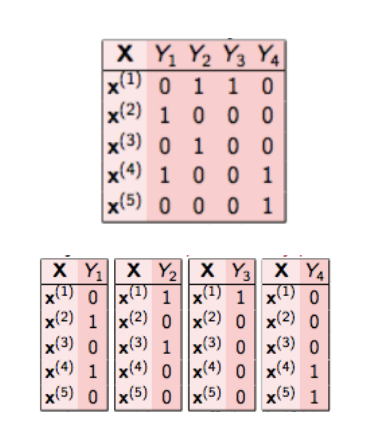

In [553]:
from IPython.display import Image
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\BinaryRelevance.png",width=300, height=300)

### TARGET LABELS [G1, G2, G3]

In [481]:
x=student_dummies.drop(['G1','G2','G3'],axis=1)

In [482]:
y=student_dummies[['G1','G2','G3']]

In [500]:
a_train, a_test, b_train, b_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [503]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
#classifier = BinaryRelevance(RandomForestClassifier())
#classifier = BinaryRelevance(GaussianNB())
classifier = BinaryRelevance(LogisticRegression())

# train
classifier.fit(a_train, b_train)

# predict
predictions = classifier.predict(a_test)

In [533]:
predictions.todense()

matrix([[0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [1, 1, 1],
        [1, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [0, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [0, 1, 0],
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 1],
        [0, 1, 0],
        [1, 1, 0],
        [1, 1, 1],
        [1, 1, 1],
        [0, 1, 1],
        [1, 1, 1],
        [1, 

In [534]:
accuracy_score(b_test,predictions)

0.52100840336134457

### TARGET LABELS  [G2, G3]

In [538]:
x2=student_dummies.drop(['G2','G3'],axis=1)

In [539]:
y2=student_dummies[['G2','G3']]

In [540]:
a2_train, a2_test, b2_train, b2_test = train_test_split(x2,y2, test_size=0.3, random_state=42)

In [543]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
#classifier = BinaryRelevance(RandomForestClassifier())
#classifier = BinaryRelevance(GaussianNB())
classifier = BinaryRelevance(LogisticRegression())

# train
classifier.fit(a2_train, b2_train)

# predict
predictions2 = classifier.predict(a2_test)

In [544]:
accuracy_score(b2_test,predictions2)

0.76470588235294112

## b) Classifier Chains
 -The first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.

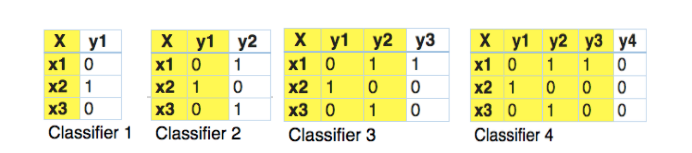

In [551]:
from IPython.display import Image
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\ClassifierChains.png",width=700, height=700)


### TARGET LABELS [G1, G2, G3]

In [548]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(LogisticRegression())

# train
classifier.fit(a_train, b_train)

# predict
predictions = classifier.predict(a_test)
 
 
accuracy_score(b_test,predictions)

0.5714285714285714

### TARGET LABELS [G2, G3]

In [550]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(LogisticRegression())

# train
classifier.fit(a2_train, b2_train)

# predict
predictions = classifier.predict(a2_test)
 
 
accuracy_score(b2_test,predictions)

0.80672268907563027

### 2. Algorithm adaptation methods

# Multi label classification
###### Algorithm adaptation
  currently none in scikit-multilearn in the future they will be placed in skmultilearn.adapt
###### Problem transformation 
  such as Binary Relevance, Label Powerset & more, are now available from skmultilearn.problem_transformation
###### Ensemble classification 
  such as RAkEL or label space partitioning classifiers, are now available from skmultilearn.ensemble

# Yeast dataset practice

In [505]:
import scipy
from scipy.io import arff
data, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/yeast/yeast-train.arff')
df = pd.DataFrame(data)

In [506]:
df.shape

(1500, 117)

In [507]:
df.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,0.043477,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'1'
4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [508]:
for i in range(df.columns.get_loc("Class1"),df.columns.get_loc("Class14")+1):
    df.iloc[:,i] =df.iloc[:,i] .replace(df.iloc[:,i] .unique()[1], 1)
    df.iloc[:,i]  =df.iloc[:,i] .replace(df.iloc[:,i] .unique()[0], 0)

In [509]:
for i in range(df.columns.get_loc("Class1"),df.columns.get_loc("Class14")+1):
      print(df.iloc[:,i].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [510]:
df.head(1)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.0937,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.00551,0.027523,0.043477,...,0,0,0,0,0,0,0,0,0,0


In [511]:
#df['suma']= df.iloc[:, 10:24].sum(axis=1)
#df['suma']= df.iloc[:, df.columns.get_loc("Class1"):df.columns.get_loc("Class14")].sum(axis=1)
#df['suma']=df['Class1']+df['Class2']

In [512]:
#df.loc[:,[df.iloc[:,0], df.iloc[:,1]]]
y_yeast=df.loc[:,"Class1":"Class14"]


In [513]:
x_yeast=df.drop(y_yeast,axis=1)

In [514]:
x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test = train_test_split(x_yeast,y_yeast, test_size=0.3, random_state=42)

In [515]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(RandomForestClassifier())


# train
classifier.fit(x_yeast_train, y_yeast_train)

# predict
predictions = classifier.predict(x_yeast_test)

In [516]:
x_yeast_test.shape

(450, 103)

In [517]:
predictions.todense()

matrix([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 0, 0],
        ..., 
        [0, 0, 1, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 1, 0],
        [1, 1, 0, ..., 1, 1, 0]], dtype=int64)

In [518]:
accuracy_score(y_yeast_test,predictions)

0.10444444444444445

### RANDOM DATASET

In [519]:
from sklearn.datasets import make_multilabel_classification

# this will generate a random multi-label dataset
x_random, y_random = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)

In [520]:
x_random_train, x_random_test, y_random_train, y_random_test = train_test_split(x_random,y_random, test_size=0.3, random_state=42)

1.Problem transformation method

In this method, we will try to transform our multi-label problem into single-label problem(s).

This method can be carried out in three different ways as:

Binary Relevance

Classifier Chains

Label Powerset

### Binary Relevance

In [209]:
!pip install scikit-multilearn

In [526]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_random_train, y_random_train)

# predict
predictions = classifier.predict(x_random_test)

In [527]:
from sklearn.metrics import accuracy_score
accuracy_score(y_random_test,predictions)

0.69999999999999996

In [ ]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE

#feature extraction

rfe = RFE(lr, 25)
fit = rfe.fit(a_train, b_train.iloc[:,2])
print("Number of Features:",  fit.n_features_)
#print("Selected Features:" , fit.support_)
print("Feature Ranking::" , fit.ranking_)

#prediktivnaMoc=[fit.ranking_]
#print(atributi)
#print(prediktivnaMoc)
atributi=list(a_train.columns)

izabrani_atributi=[]
for y in range(len(fit.ranking_)):
        if fit.ranking_[y]==1:
            izabrani_atributi.append(atributi[y])
            
print('izabrani atributi su :',izabrani_atributi) 
